In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import sys
import os

# Add the root directory to the Python path
root_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_path)

from forget import memory_retention

Vary decay and plot retention

In [5]:
def plot_memory_retention(ax, decay_constant, boost_factor, memory_stability_values):
    last_access = 0.0  # Constant across all plots
    time_elapsed_values = np.linspace(0, 10, 100)  # Adjust the range as needed

    for original_stability in memory_stability_values:
        retentions = []
        stabilities = []
        stability = original_stability

        for time_elapsed in time_elapsed_values:
            retention, stability = memory_retention(
                time_elapsed, stability, decay_constant, boost_factor, last_access)
            retentions.append(retention)
            stabilities.append(stability)

        # Plot retention on the given axis
        ax.plot(time_elapsed_values, retentions,
                label=f'Original Stability = {original_stability}')
        ax.set_title(f'Decay Constant: {decay_constant:.3f}, Boost Factor: {boost_factor:.3f}')
        ax.set_xlabel('Time Elapsed')
        ax.set_ylabel('Memory Retention')

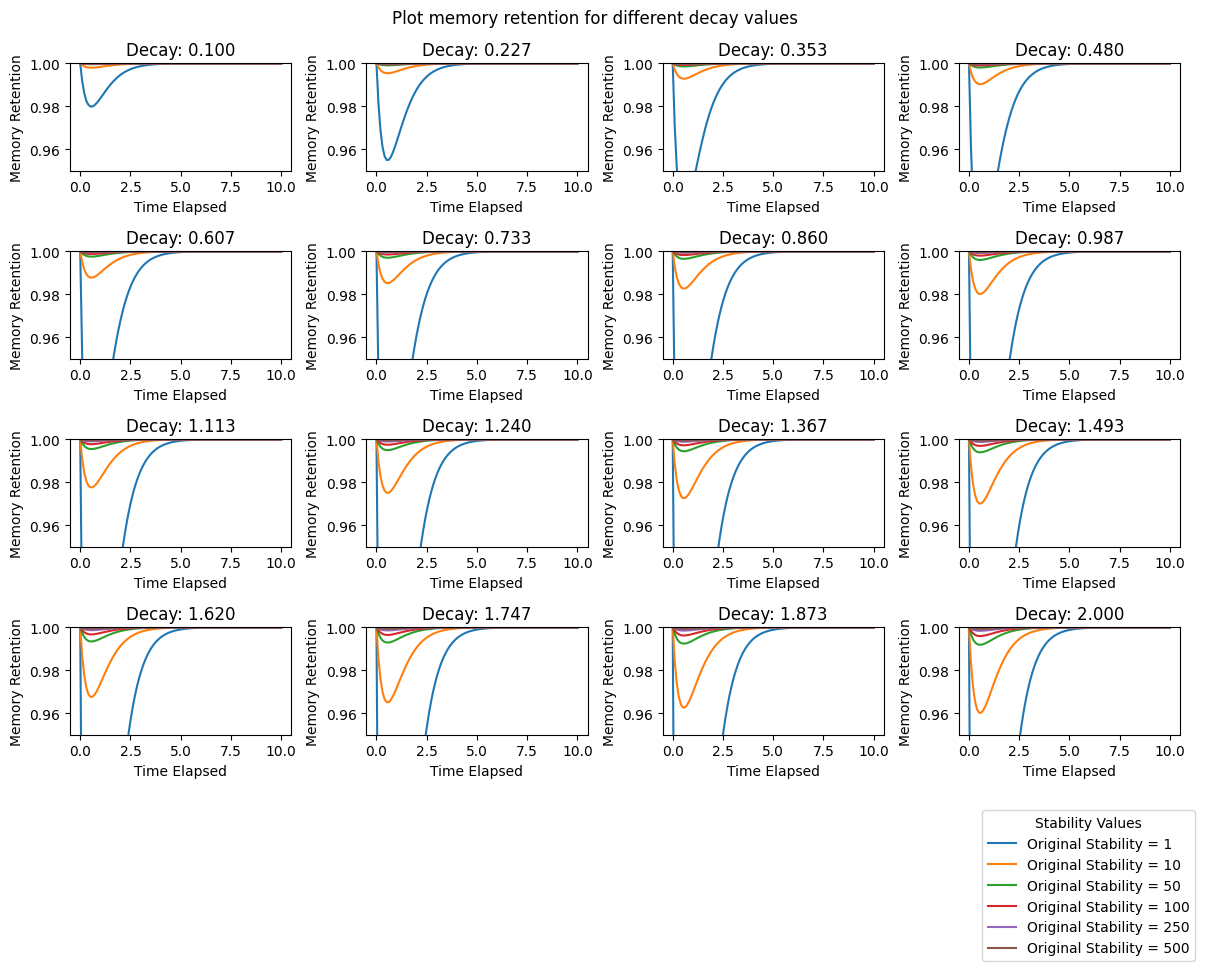

In [8]:
# Choose parameter values
decay_constants = np.linspace(0.1, 2.0, 16)  # Grid of 16 values for decay_constant
boost_factor = 1.2  # You can set a specific value for boost_factor
memory_stability_values = [1, 10, 50, 100, 250, 500]

fig, axes = plt.subplots(4, 4, figsize=(12, 8))

# Create a list to store stability labels and use it to add labels only once
stability_labels_added = False

for i, decay_constant in enumerate(decay_constants):
    # Call the function to plot on the specified axis
    ax = axes.flatten()[i]
    ax.set_ylim(0.950, 1)  # Adjust the limits as needed
    plot_memory_retention(ax, decay_constant, boost_factor, memory_stability_values)
    ax.set_title(f'Decay: {decay_constant:.3f}')

    # Add stability labels only once
    if not stability_labels_added:
        stability_labels_added = True
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(1, -0.21), borderaxespad=0., title='Stability Values')

fig.suptitle('Plot memory retention for different decay values')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Vary decay and plot stability

In [10]:
def plot_stability(ax, time_range, decay_constant, boost_factor, memory_stability_values):
    last_access = 0.0  # Constant across all plots
    time_elapsed_values = np.linspace(0, time_range, 100)  # Adjust the range as needed

    for original_stability in memory_stability_values:
        retentions = []
        stabilities = []
        stability = original_stability

        for time_elapsed in time_elapsed_values:
            retention, stability = memory_retention(
                time_elapsed, stability, decay_constant, boost_factor, last_access)
            retentions.append(retention)
            stabilities.append(stability)

        # Plot retention on the given axis
        ax.plot(time_elapsed_values, stabilities,
                label=f'Original Stability $S_0$ = {original_stability}')
        ax.set_title(f'Decay Constant: {decay_constant:.3f}, Boost Factor: {boost_factor:.3f}')
        #ax.set_xscale('log')  # Set x-axis to logarithmic scale
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        ax.set_xlabel('Time Elapsed')
        ax.set_ylabel('Memory Stability (log)')

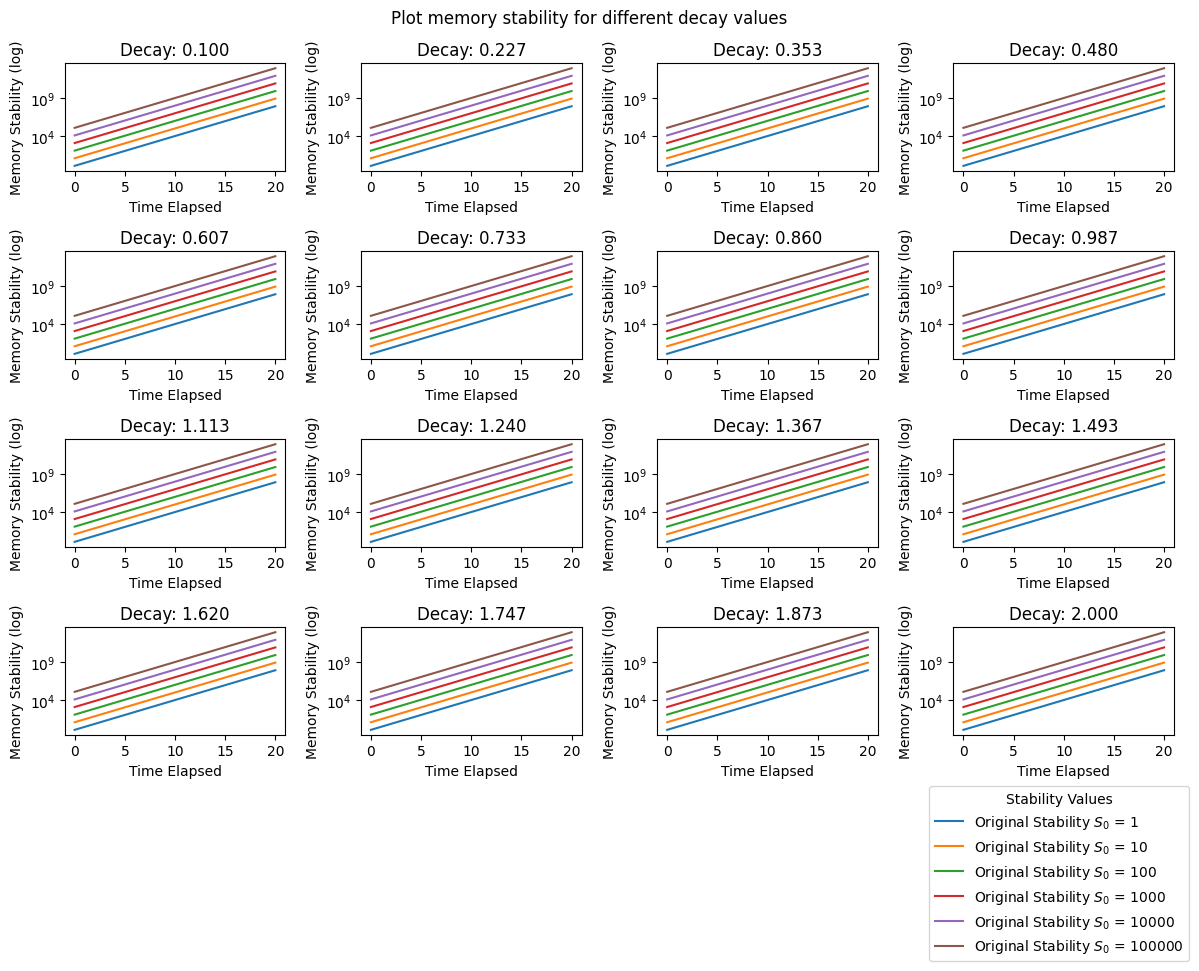

In [11]:
# Choose parameter values
decay_constants = np.linspace(0.1, 2.0, 16)  # Grid of 16 values for decay_constant
boost_factor = 1.2  # You can set a specific value for boost_factor
memory_stability_values = [1, 10, 100, 1000, 10_000, 100_000]
time_range = 20

fig, axes = plt.subplots(4, 4, figsize=(12, 8))

# Create a list to store stability labels and use it to add labels only once
stability_labels_added = False

# Lists to store y-axis limits for all subplots
y_limits = []

for i, decay_constant in enumerate(decay_constants):
    # Call the function to plot on the specified axis
    ax = axes.flatten()[i]
    plot_stability(ax, time_range, decay_constant, boost_factor, memory_stability_values)
    ax.set_title(f'Decay: {decay_constant:.3f}')

    # Store y-axis limits for each subplot
    y_limits.append(ax.get_ylim())

# Find the overall y-axis limits
global_y_min = min(y[0] for y in y_limits)
global_y_max = max(y[1] for y in y_limits)

# Set the same y-axis limits for all subplots
for ax in axes.flatten():
    ax.set_ylim(global_y_min, global_y_max)

# Add stability labels only once
if not stability_labels_added:
    stability_labels_added = True
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(1, -0.21), borderaxespad=0., title='Stability Values')

fig.suptitle('Plot memory stability for different decay values')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Vary boost factor

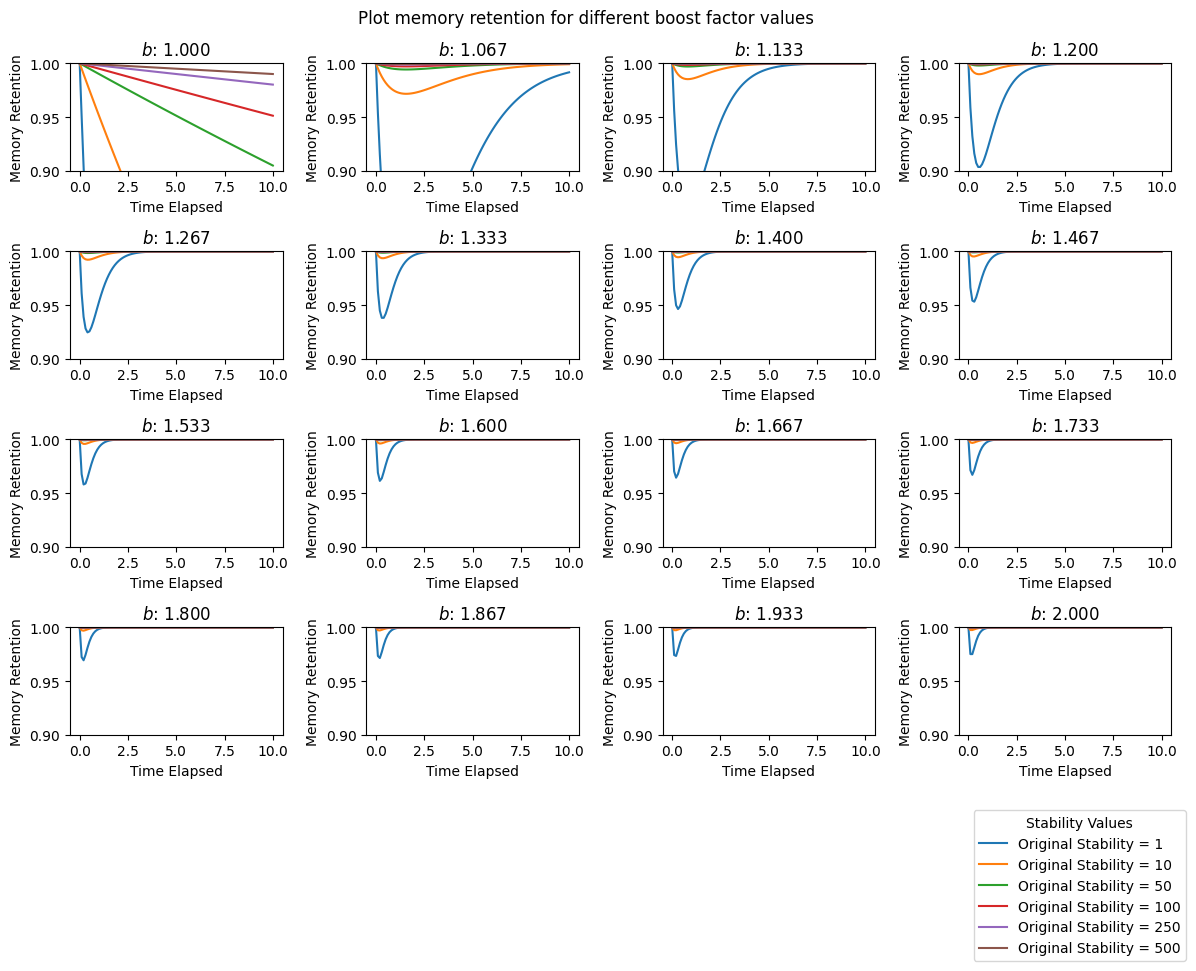

In [14]:
# Choose parameter values
decay_constant = 0.5  # Set a specific value for decay_constant
boost_factors = np.linspace(1.0, 2.0, 16)  # Grid of 16 values for boost_factor
memory_stability_values = [1, 10, 50, 100, 250, 500]

fig, axes = plt.subplots(4, 4, figsize=(12, 8))

# Create a list to store stability labels and use it to add labels only once
stability_labels_added = False

for i, boost_factor in enumerate(boost_factors):
    # Call the function to plot on the specified axis
    ax = axes.flatten()[i]
    ax.set_ylim(0.90, 1)  # Adjust the limits as needed
    plot_memory_retention(ax, decay_constant, boost_factor, memory_stability_values)
    ax.set_title(f'$b$: {boost_factor:.3f}')

    # Add stability labels only once
    if not stability_labels_added:
        stability_labels_added = True
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(1, -0.21), borderaxespad=0., title='Stability Values')

fig.suptitle('Plot memory retention for different boost factor values')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()